In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Example DataFrame
results_df = pd.DataFrame(columns=['bert_model', 'train_accuracy', 'train_loss', 'train_time',
                                   'val_accuracy', 'val_loss', 'val_time',
                                   'test_accuracy', 'test_precision', 
                                   'test_recall', 'test_F1'])

# Assuming you have stored each metric in a variable, add them to the DataFrame
# Repeat for each model

bert_models = ["bert-base-uncased",
               "roberta-base",
               "deberta-base",
               "distilbert-base-uncased",
               "albert-base-v2",
               ]

train_accuracy = []
train_loss = []
train_time = []
val_accuracy = []
val_loss = []
val_time = []
test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []

fine_tuning_stats_dict = {}

from datetime import datetime

for bert_model in bert_models:
    stats = pd.read_csv(f"{bert_model}/fine_tuning_statistics.csv")
    fine_tuning_stats_dict[bert_model] = stats

    train_accuracy.append(stats['train_accuracy'].iloc[-1])
    train_loss.append(stats['train_loss'].iloc[-1])
    train_time_formatted = datetime.strptime(stats['train_time'].iloc[-1], "%H:%M:%S")
    train_time_in_seconds = train_time_formatted.hour * 3600 + train_time_formatted.minute * 60 + train_time_formatted.second
    train_time.append(train_time_in_seconds)
    val_accuracy.append(stats['val_accuracy'].iloc[-1])
    val_loss.append(stats['val_loss'].iloc[-1])
    val_time_formatted = datetime.strptime(stats['val_time'].iloc[-1], "%H:%M:%S")
    val_time_in_seconds = val_time_formatted.hour * 3600 + val_time_formatted.minute * 60 + val_time_formatted.second
    val_time.append(val_time_in_seconds)

testing_results_known_labels = {}

for bert_model in bert_models:
    stats = pd.read_csv(f"{bert_model}/testing_results_known_labels.csv")
    testing_results_known_labels[bert_model] = stats

    true_is_duplicate, predicted_is_duplicate = stats['true_is_duplicate'], stats['predicted_is_duplicate']
    
    true_label = 1
    false_label = 0
    accuracy = np.mean(true_is_duplicate == predicted_is_duplicate)
    precision = np.sum((predicted_is_duplicate == true_label) & (true_is_duplicate == true_label)) / np.sum(predicted_is_duplicate == true_label)
    recall = np.sum((predicted_is_duplicate == true_label) & (true_is_duplicate == true_label)) / np.sum(true_is_duplicate == true_label)
    F1 = 2 * precision * recall / (precision + recall)

    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_F1.append(F1)

results_df = pd.DataFrame({
    'bert_model': bert_models,
    'train_accuracy': train_accuracy,
    'train_loss': train_loss,
    'train_time_per_epoch_seconds': train_time,
    'val_accuracy': val_accuracy,
    'val_loss': val_loss,
    'val_time_per_epoch_seconds': val_time,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_F1': test_F1
})

# round whole dataframe to 6 decimals
results_df = results_df.round(6)
results_df.to_csv('all_bert_models_statistics.csv', index=False)  
# Add rows for RoBERTa, ALBERT, DistilBERT, and DeBERTa similarly


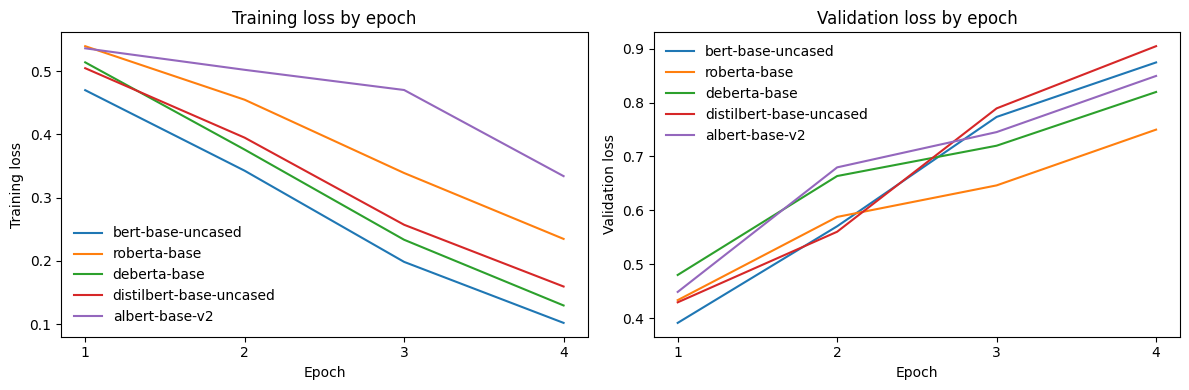

In [4]:
import matplotlib.pyplot as plt

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss on the first subplot
axs[0].set_title("Training loss by epoch")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Training loss")
axs[0].set_xticks([1, 2, 3, 4])
for bert_model, stats in fine_tuning_stats_dict.items():
    axs[0].plot(stats["epoch"], stats["train_loss"], label=f"{bert_model}")
axs[0].legend(frameon=False)

# Plot validation loss on the second subplot
axs[1].set_title("Validation loss by epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Validation loss")
axs[1].set_xticks([1, 2, 3, 4])
for bert_model, stats in fine_tuning_stats_dict.items():
    axs[1].plot(stats["epoch"], stats["val_loss"], label=f"{bert_model}")
axs[1].legend(frameon=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


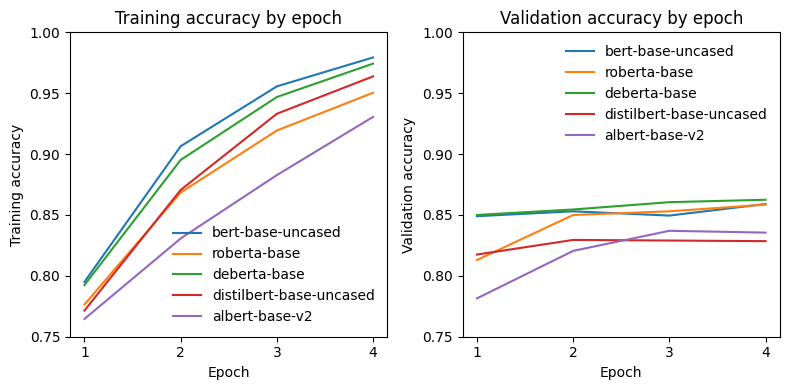

In [5]:
import matplotlib.pyplot as plt

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot training accuracy on the first subplot
axs[0].set_title("Training accuracy by epoch")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Training accuracy")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_ylim(0.75, 1)
for bert_model, stats in fine_tuning_stats_dict.items():
    axs[0].plot(stats["epoch"], stats["train_accuracy"], label=f"{bert_model}")
axs[0].legend(frameon=False)

# Plot validation accuracy on the second subplot
axs[1].set_title("Validation accuracy by epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Validation accuracy")
axs[1].set_xticks([1, 2, 3, 4])
axs[1].set_ylim(0.75, 1)
for bert_model, stats in fine_tuning_stats_dict.items():
    axs[1].plot(stats["epoch"], stats["val_accuracy"], label=f"{bert_model}")
axs[1].legend(frameon=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


[0.233  0.509  0.2155 0.6095 0.5085]


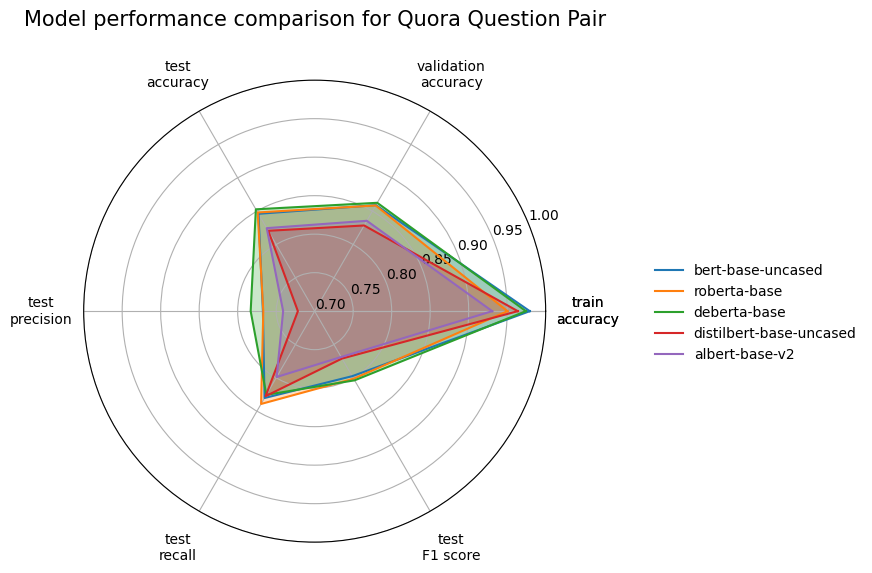

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

x_max = 2000
x_min = 0
normalized_train_time = 1 - (np.array(train_time) - x_min) / (x_max - x_min)
print(normalized_train_time)

# Data from the user's input
data = {
    #'train_time_one_epoch_seconds': normalized_train_time,
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_F1': test_F1,
}


# Creating DataFrame
df = pd.DataFrame(data)

df.head()

# Scaling and inverting the training time so lower is better
scaler = MinMaxScaler()
df = df.to_numpy()

# Set up the radar chart
labels = [
    #"training time\nper epoch\n(seconds)",
    "train\naccuracy",
    "validation\naccuracy",
    "test\naccuracy",
    "test\nprecision",
    "test\nrecall",
    "test\nF1 score"
]
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
df = np.concatenate((df, df[:, [0]]), axis=1)  # Close the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in enumerate(df):

    ax.plot(angles, row, label=bert_models[i])
    ax.fill(angles, row, alpha=0.25)

ax.set_xticks(angles)
ax.set_xticklabels(labels + labels[:1], fontsize=10)
ax.tick_params(axis='x', which='major', pad=20)
ax.set_ylim([0.7, 1.0])
# Title and legend
plt.title('Model performance comparison for Quora Question Pair', size=15, color='black', y=1.1)
plt.legend(frameon=False,loc='upper right', bbox_to_anchor=(1.7, 0.63))  # Adjust the position here
plt.show()



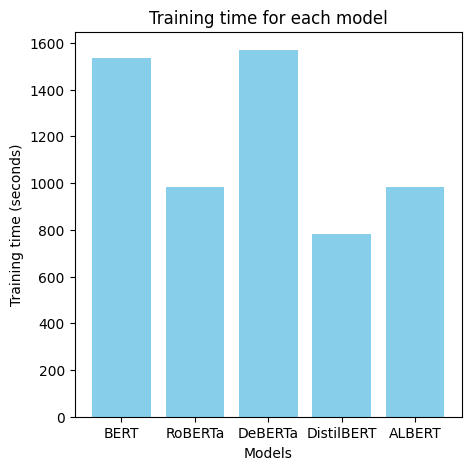

In [7]:
plt.figure(figsize=(5,5))
bert_models_formatted = ["BERT", "RoBERTa", "DeBERTa", "DistilBERT", "ALBERT"]
plt.bar(bert_models_formatted, train_time, color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Training time (seconds)')
plt.title('Training time for each model')
plt.show()

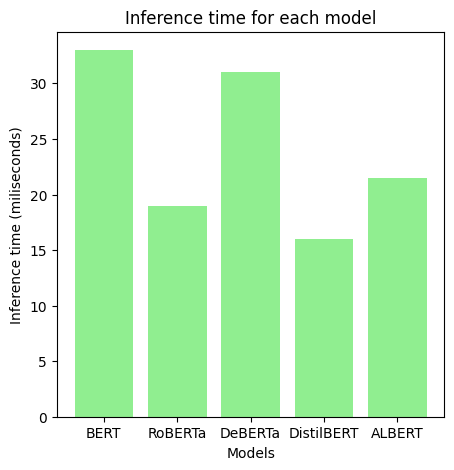

In [8]:
plt.figure(figsize=(5,5))
plt.bar(bert_models_formatted, np.array(val_time)/2000 * 1000, color = 'lightgreen')
plt.xlabel('Models')
plt.ylabel('Inference time (miliseconds)')
plt.title('Inference time for each model')
plt.show()

In [9]:
!pip install data-science-utils

Confusion Matrix:
[[2166  373]
 [ 235 1226]]


C:\Users\springnuance\AppData\Local\Temp\ipykernel_20240\3654142227.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + np.unique(y_true).tolist())
C:\Users\springnuance\AppData\Local\Temp\ipykernel_20240\3654142227.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + np.unique(y_true).tolist())


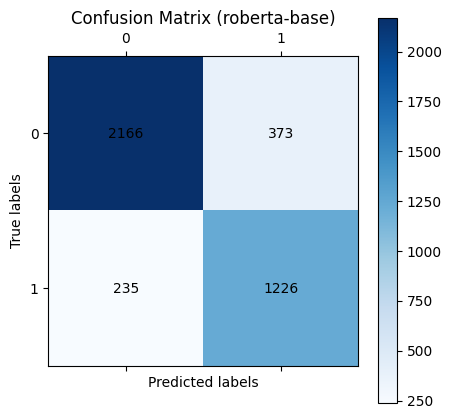

Precision: 0.766729205753596
Recall: 0.839151266255989
F1 Score: 0.8013071895424837
False Positive Rate: [0.         0.14690823 1.        ]
True Positive Rate: [0.         0.83915127 1.        ]


In [11]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve

bert_model = "roberta-base"

y_true = testing_results_known_labels[bert_model]['true_is_duplicate']
y_pred = testing_results_known_labels[bert_model]['predicted_is_duplicate']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix with Annotation
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels([''] + np.unique(y_true).tolist())
ax.set_yticklabels([''] + np.unique(y_true).tolist())
plt.title(f'Confusion Matrix ({bert_model})')

# Annotate each cell with the numerical count
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.show()

# Precision, Recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")